<a href="https://colab.research.google.com/github/malvibid/COMP3029-Computer-Vision/blob/main/COMP3029_Computer_Vision_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMP3029 COMPUTER VISION COURSEWORK** 

*Spring 2022/2023*, School of Computer Science, University of Nottingham Malaysia

```
GROUP 4: 
  20306551 - Mustafa Mehmood
  20311657 - Omar Ismail
  20311860 - Gabriel Hoh Chao Jei
  20187945 - Malvi Bid
```





# ⚡Challenges

```
Key: ✅ Challenge solved 🟥 Pending solution
```

*   🟥 Size of the bounding box to extract an individual seed from Batch 2 and 3 is not equal. In order to address this, I used the `torchvision.transforms.Resize` method to resize the extracted seed image region to 256px by 256px, like the images in Batch 1. However, this produces some blanks 🥴. For example, see Visualise batches section - output of the [Test B3 batch](#scrollTo=coQAUVW5FZcQ&line=1&uniqifier=1).




# Import Dependencies

In [1]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.utils as vutils
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from google.colab import drive

# Mount google drive

In [2]:
# Mount drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Dataset folder structure

In [3]:
!ls -F '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/'

Batch-1/  Batch-2/  Batch-3/


In [4]:
print("Batch-1/ ")
!ls -F -X '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1'
print("\nBatch-2/ ")
!ls -F -X '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-2'
print("\nBatch-3/ ")
!ls -F -X '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-3'

Batch-1/ 
seedsegment@  seedsplit@

Batch-2/ 
NormalRoomLighting@  NormalRoomLight_annotation.csv

Batch-3/ 
LightBox@  LightBox_annotation.csv


## Dataset structure tree


```
.
└── Datasets/
    ├── Batch-1/
    │   └── seedsegment/
    │       ├── test/
    │       │   ├── BadSeed/
    │       │   │   ├── badtest0.png
    │       │   │   ├── badtest1.png
    │       │   │   └── ...
    │       │   └── GoodSeed/
    │       │       ├── goodtest0.png
    │       │       ├── goodtest1.png
    │       │       └── ...
    │       └── train/
    │           ├── BadSeed/
    │           │   ├── badtrain0.png
    │           │   ├── badtrain1.png
    │           │   └── ...
    │           └── GoodSeed/
    │               ├── goodtrain0.png
    │               ├── goodtrain1.png
    │               └── ...
    ├── Batch-2/
    │   ├── NormalRoomLight_annotation.csv
    │   └── NormalRoomLighting/
    │       ├── Set1/
    │       │   ├── Line_Bad_Seeds(s1).JPG
    │       │   ├── Line_Bad_Seeds(s1).xml
    │       │   ├── Line_Good_Seeds(s1).JPG
    │       │   ├── Line_Good_Seeds(s1).xml
    │       │   ├── Line_Mix(s1).JPG
    │       │   ├── Line_Mix(s1).xml
    │       │   ├── SpaceOutRandom_Bad_Seeds(s1).JPG
    │       │   ├── SpaceOutRandom_Bad_Seeds(s1).xml
    │       │   ├── SpaceOutRandom_Good_Seeds(s1).JPG
    │       │   ├── SpaceOutRandom_Good_Seeds(s1).xml
    │       │   ├── SpaceOutRandom_Mix(s1).JPG
    │       │   └── SpaceOutRandom_Mix(s1).xml
    │       ├── ...
    │       └── Set15/
    │           ├── Line_Bad_Seeds(s15).JPG
    │           ├── Line_Bad_Seeds(s15).xml
    │           ├── Line_Good_Seeds(s15).JPG
    │           ├── Line_Good_Seeds(s15).xml
    │           ├── Line_Mix(s15).JPG
    │           ├── Line_Mix(s15).xml
    │           ├── SpaceOutRandom_Bad_Seeds(s15).JPG
    │           ├── SpaceOutRandom_Bad_Seeds(s15).xml
    │           ├── SpaceOutRandom_Good_Seeds(s15).JPG
    │           ├── SpaceOutRandom_Good_Seeds(s15).xml
    │           ├── SpaceOutRandom_Mix(s15).JPG
    │           └── SpaceOutRandom_Mix(s15).xml
    └── Batch-3/
        ├── LightBox_annotation.csv
        └── LightBox/
            ├── Set1/
            │   ├── Line_Bad_Seeds(s1).JPG
            │   ├── Line_Bad_Seeds(s1).xml
            │   ├── Line_Good_Seeds(s1).JPG
            │   ├── Line_Good_Seeds(s1).xml
            │   ├── Line_Mix(s1).JPG
            │   ├── Line_Mix(s1).xml
            │   ├── SpaceOutRandom_Bad_Seeds(s1).JPG
            │   ├── SpaceOutRandom_Bad_Seeds(s1).xml
            │   ├── SpaceOutRandom_Good_Seeds(s1).JPG
            │   ├── SpaceOutRandom_Good_Seeds(s1).xml
            │   ├── SpaceOutRandom_Mix(s1).JPG
            │   └── SpaceOutRandom_Mix(s1).xml
            ├── ...
            └── Set20/
                ├── Line_Bad_Seeds(s20).JPG
                ├── Line_Bad_Seeds(s20).xml
                ├── Line_Good_Seeds(s20).JPG
                ├── Line_Good_Seeds(s20).xml
                ├── Line_Mix(s20).JPG
                ├── Line_Mix(s20).xml
                ├── SpaceOutRandom_Bad_Seeds(s20).JPG
                ├── SpaceOutRandom_Bad_Seeds(s20).xml
                ├── SpaceOutRandom_Good_Seeds(s20).JPG
                ├── SpaceOutRandom_Good_Seeds(s20).xml
                ├── SpaceOutRandom_Mix(s20).JPG
                └── SpaceOutRandom_Mix(s20).xml
```

# Custom Seed Dataset and Dataloader


In [5]:
# Custom dataset class inheriting from the PyTorch Dataset class
class SeedDataset(Dataset):
    def __init__(self, dataset_dir=None, batch=None, train=True, transform=None, annotations=None):
        self.dataset_dir = dataset_dir
        self.batch = batch
        self.train = train
        self.transform = transform
        self.annotations = annotations
        self.categories = ['BadSeed', 'GoodSeed']
                
        self.data = []
        
        if self.batch == 1:
            self.batch1()
        
        if self.batch == 2 or self.batch == 3:
            self.batch2and3()
        
        #print(self.data)

    def batch1(self):
      data_dir = os.path.join(self.dataset_dir, 'train' if self.train else 'test')
      for category_idx, category in enumerate(self.categories):
          category_dir = os.path.join(data_dir, category)
          for img_name in os.listdir(category_dir):
              if img_name.endswith('.png'):
                  self.data.append((img_name, os.path.join(category_dir, img_name), category_idx))
      
    def batch2and3(self):
      seed_df = pd.read_csv(self.annotations)
      for idx in range(len(seed_df)):
            img_path = seed_df.loc[idx, 'file_name']
            img_path = img_path.rsplit('.')[0] + '.JPG'
            x_min = seed_df.loc[idx, 'x_min']
            y_min = seed_df.loc[idx, 'y_min']
            x_max = seed_df.loc[idx, 'x_max']
            y_max = seed_df.loc[idx, 'y_max']
            bbox_label = seed_df.loc[idx, 'bbox_label']
              
            self.data.append((img_path, x_min, y_min, x_max, y_max, 0 if bbox_label == 'BAD' else 1 ))
                    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
      if self.batch == 1:
        img_name, img_path, label = self.data[idx]
        seed_img = Image.open(img_path).convert('RGB')
            
      if self.batch == 2 or self.batch == 3:
        img_path, x_min, y_min, x_max, y_max, label = self.data[idx]
        seeds_img = Image.open(img_path).convert('RGB')
        #seed_img = seeds_img[y_min:y_max, x_min:x_max,:].copy() # this will only work for a numpy image
        seed_img = seeds_img.crop((x_min, y_min, x_max, y_max)) # individual seed image
        
      if self.transform:
          seed_img = self.transform(seed_img)

      return seed_img, label

In [6]:
# Setting paths to the dataset and annotation files
dataset_root_dir = '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/'

batch1_dataset_dir = os.path.join(dataset_root_dir, 'Batch-1/seedsegment')

batch2_annotations_dir = os.path.join(dataset_root_dir, 'Batch-2/NormalRoomLight_annotation.csv')
batch3_annotations_dir = os.path.join(dataset_root_dir, 'Batch-3/LightBox_annotation.csv')

In [7]:
# Define the image transformations
image_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [8]:
# Define batch size
BATCH_SIZE = 32

In [9]:
# Instantiate the custom SeedDataset and dataloader
train_dataset = SeedDataset(dataset_dir=batch1_dataset_dir, batch=1, train=True, transform=image_transforms)
test_batch1_dataset = SeedDataset(dataset_dir=batch1_dataset_dir, batch=1, train=False, transform=image_transforms)
test_batch2_dataset = SeedDataset(batch=2, train=False, transform=image_transforms, annotations=batch2_annotations_dir)
test_batch3_dataset = SeedDataset(batch=3, train=False, transform=image_transforms, annotations=batch3_annotations_dir)

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_batch1_dataloader = DataLoader(dataset=test_batch1_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_batch2_dataloader = DataLoader(dataset=test_batch2_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_batch3_dataloader = DataLoader(dataset=test_batch3_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

## Testing dataset and dataloader

In [10]:
# Checking the dataset length and a sample of data
print(f"B1 Train Dataset length: {len(train_dataset.data)}")
print(f"B1 Train Data sample: {train_dataset.data[0]}\n")

print(f"B1 Test Dataset length: {len(test_batch1_dataset.data)}")
print(f"B1 Test Data sample: {test_batch1_dataset.data[0]}\n")

print(f"B2 Test Dataset length: {len(test_batch2_dataset.data)}")
print(f"B2 Test Data sample: {test_batch2_dataset.data[0]}\n")

print(f"B3 Test Dataset length: {len(test_batch3_dataset.data)}")
print(f"B3 Test Data sample: {test_batch3_dataset.data[0]}\n")

B1 Train Dataset length: 1752
B1 Train Data sample: ('badtrain0.png', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1/seedsegment/train/BadSeed/badtrain0.png', 0)

B1 Test Dataset length: 401
B1 Test Data sample: ('badtest2.png', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1/seedsegment/test/BadSeed/badtest2.png', 0)

B2 Test Dataset length: 900
B2 Test Data sample: ('/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-2/NormalRoomLighting/Set9/Line_Good_Seeds (s9).JPG', 343, 1280, 710, 1829, 1)

B3 Test Dataset length: 1198
B3 Test Data sample: ('/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-3/LightBox/Set9/Line_GoodSeeds (s9).JPG', 107, 1715, 512, 2059, 1)



In [11]:
# Get a batch of data from the data loader
train_images, train_labels = next(iter(train_dataloader))
b1_test_images, b1_test_labels = next(iter(test_batch1_dataloader))
b2_test_images, b2_test_labels = next(iter(test_batch2_dataloader))
b3_test_images, b3_test_labels = next(iter(test_batch3_dataloader))

### Visualise batches

Train image batch shape: torch.Size([32, 3, 256, 256])
Train labels batch shape: torch.Size([32])
Train labels: tensor([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1])


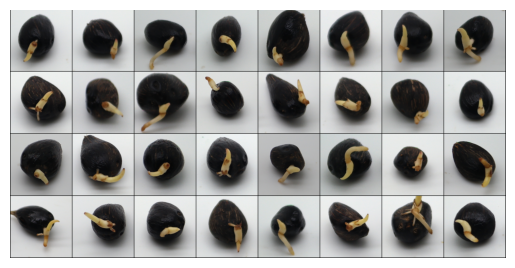

In [12]:
# Train batch
print(f"Train image batch shape: {train_images.size()}")
print(f"Train labels batch shape: {train_labels.size()}")
print(f"Train labels: {train_labels}")

# Create a grid of images from the batch to see the individual seed samples
grid = vutils.make_grid(train_images, nrow=8, padding=2, normalize=True)

# Display the grid
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()

B1 Test image batch shape: torch.Size([32, 3, 256, 256])
B1 Test labels batch shape: torch.Size([32])
B1 Test Labels: tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 0])


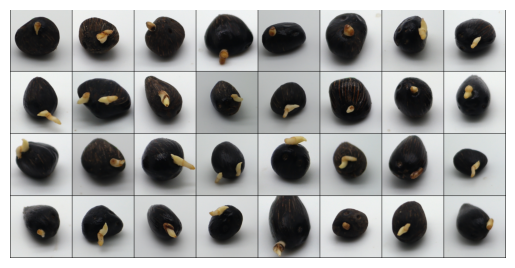

In [13]:
# Test B1
print(f"B1 Test image batch shape: {b1_test_images.size()}")
print(f"B1 Test labels batch shape: {b1_test_labels.size()}")
print(f"B1 Test Labels: {b1_test_labels}")

# Create a grid of images from the batch to see the individual seed samples
grid = vutils.make_grid(b1_test_images, nrow=8, padding=2, normalize=True)

# Display the grid
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()

B2 Test image batch shape: torch.Size([32, 3, 256, 256])
B2 Test labels batch shape: torch.Size([32])
B2 Test Labels: tensor([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1])


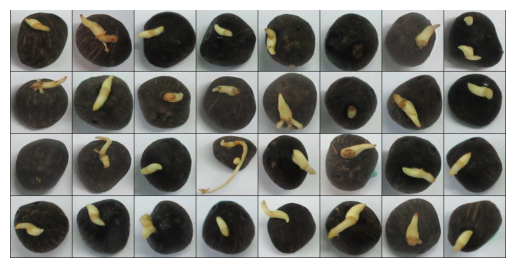

In [14]:
# Test B2
print(f"B2 Test image batch shape: {b2_test_images.size()}")
print(f"B2 Test labels batch shape: {b2_test_labels.size()}")
print(f"B2 Test Labels: {b2_test_labels}")

# Create a grid of images from the batch to see the individual seed samples
grid = vutils.make_grid(b2_test_images, nrow=8, padding=2, normalize=True)

# Display the grid
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()

B3 Test image batch shape: torch.Size([32, 3, 256, 256])
B3 Test labels batch shape: torch.Size([32])
B3 Test Labels: tensor([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0])


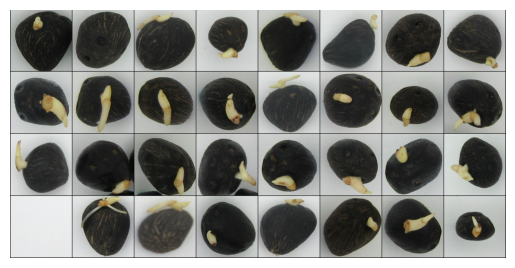

In [15]:
# Test B3
print(f"B3 Test image batch shape: {b3_test_images.size()}")
print(f"B3 Test labels batch shape: {b3_test_labels.size()}")
print(f"B3 Test Labels: {b3_test_labels}")
# Create a grid of images from the batch to see the individual seed sample
grid = vutils.make_grid(b3_test_images, nrow=8, padding=2, normalize=True)

# Display the grid
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()